<div>
<h1>Solve Xporters traffic volume problem</h1>
<em><font size="-2">Organisers : Alexis de Russ&eacute;, Florian Bertelli, Gaspard Donada--Vidal, Ghassen Chaabane, Moez Ezzeddine, Ziheng Li</font></em>
<hr>
<figure><img src="logo.jpg", width=300, border=20 style="float:left;margin:5px"></figure>
<p><br>This code was tested with Python 3.7 |Anaconda custom (64-bit)| (Oct 01 2019, 11:07:29) (<a href="https://anaconda.org/">https://anaconda.org/</a>).<br>
<font size="-3">ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</font></p></div>

<div>
    <h2>Introduction </h2>
    <p>
With globalization, our world tends to be more and more connected, so this implies more and more transport. There
 are various types of transports: transports of goods, energy, information, or people.This century will be marked by a revolution in the transport of people. With the development of autonomous cars, more and more data will be collected: speed, location, population,etc. The challenge is to get value from this. As the number of cars, and particularly autonomous cars tends to grow, we'll need to deal with an increasing traffic flow to avoid huge traffic jams. Indeed, some experts pretend that autonomous vehicles will be able to reduce travelling timeup to 30%, even if the world traffic increases of 10%.
But how is it possible to reduce travelling time and traffic jams if the number of vehicles increases ? Thanks to prediction. <br>
        In fact, prediction will be the key to determine the fastest way to get you from your home to your work, without getting in traffic jams. Predictions may also be used to determine which transportation infrastructures to
build.
            <p>
Xporters challenge is a small standard multivariable regression data set from the <a href="http://archive.ics.uci.edu/ml/datasets/">UCI Machine Learning Repository</a>, formatted in the AutoML format. It uses a data set concerning the traffic volume off an highway in the USA from 2012 to 2018, the date, and some informations about the weather. The aim of this challenge is to predict the traffic volume thanks to this features</div>


In [1]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import sklearn
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
</div>

In [3]:
from data_io import read_as_df
#data_dir = 'sample_data'        # Change this to the directory where you put the input data
data_dir = './input_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'xporters'
!ls $data_dir*

xporters_feat.name      xporters_test.data      xporters_valid.data
xporters_private.info   xporters_train.data
xporters_public.info    xporters_train.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [4]:
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading ./input_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


In [5]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
0,0,267.510,0.0,0.0,40,85.821965,6,1,12,2017,...,0,0,0,0,0,0,0,0,0,759.0
1,0,293.720,0.0,0.0,90,72.271517,5,11,6,2018,...,0,0,0,0,0,0,0,0,0,4085.0
2,0,302.180,0.0,0.0,0,65.922514,1,19,7,2013,...,0,0,0,0,0,0,0,0,0,3528.0
3,0,255.580,0.0,0.0,75,90.673493,1,5,2,2014,...,0,0,0,0,0,0,0,0,0,2636.0
4,0,286.381,0.0,0.0,0,97.325080,2,18,10,2016,...,0,0,0,0,0,0,0,0,0,4226.0


In [6]:
data.describe() 

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,...,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,0.001245,281.197804,0.379081,0.000203,49.350284,80.079942,2.984311,11.408578,6.518009,2015.510645,...,0.000337,0.005990,0.002515,0.000052,0.001167,0.000363,0.001193,0.000856,0.000415,3258.740788
std,0.035259,13.239935,50.073028,0.007602,39.029958,9.992938,2.003339,6.947282,3.405988,1.892133,...,0.018358,0.077165,0.050091,0.007202,0.034141,0.019050,0.034518,0.029241,0.020365,1987.121630
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.724760,0.000000,0.000000,1.000000,2012.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,73.343967,1.000000,5.000000,4.000000,2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1195.000000
50%,0.000000,282.341000,0.000000,0.000000,64.000000,80.134711,3.000000,11.000000,7.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3377.000000
75%,0.000000,291.790000,0.000000,0.000000,90.000000,86.771668,5.000000,17.000000,9.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,128.465356,6.000000,23.000000,12.000000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7260.000000


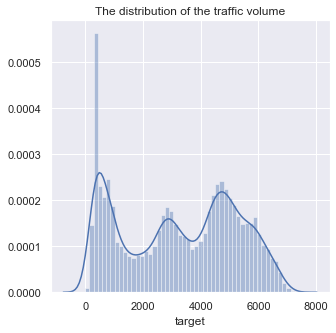

In [7]:
plt.figure(figsize = (5,5))
sns.distplot(data['target'], bins=50)
plt.title('The distribution of the traffic volume')
plt.show()

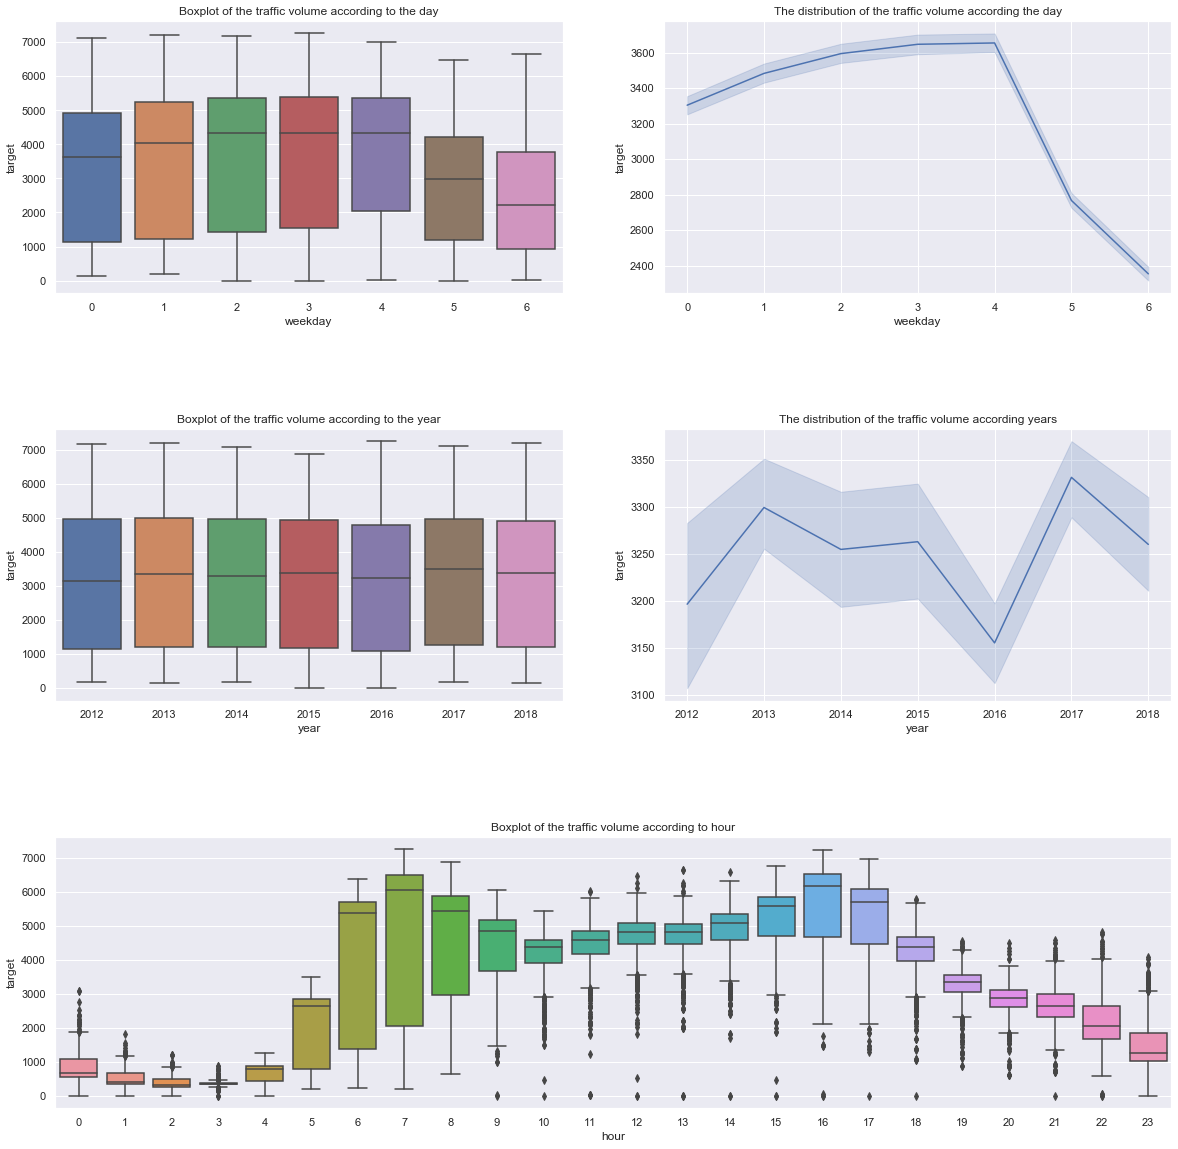

In [8]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(313)
sns.boxplot('hour','target', data= data)
plt.title('Boxplot of the traffic volume according to hour')

plt.subplot(321)
sns.boxplot('weekday','target', data= data)
plt.title('Boxplot of the traffic volume according to the day')
plt.subplot(322)
sns.lineplot('weekday','target', data= data)
plt.title("The distribution of the traffic volume according the day")

plt.subplot(323)
sns.boxplot('year','target', data= data)
plt.title('Boxplot of the traffic volume according to the year')
plt.subplot(324)
sns.lineplot('year','target', data= data)
plt.title("The distribution of the traffic volume according years")
plt.show()

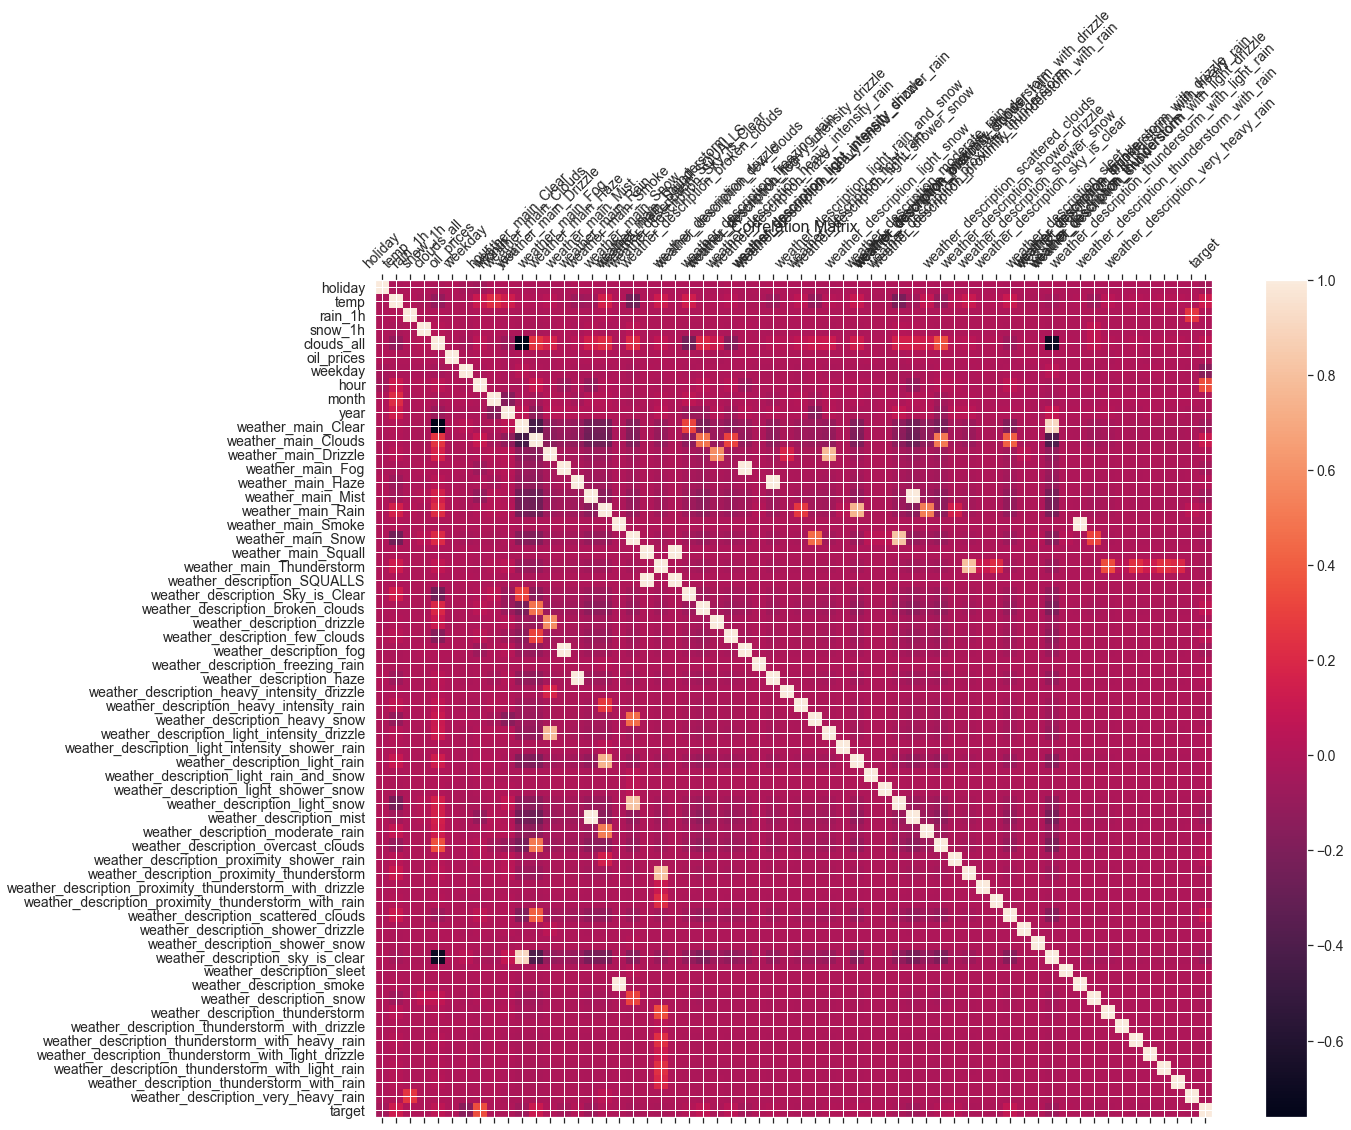

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
print('Most important features according to the correlation with target')
most_important_features = data.corr()['target'].sort_values(ascending=False)[:10]
print (data.corr()['target'].sort_values(ascending=False)[:10], '\n')

Most important features according to the correlation with target
target                                       1.000000
hour                                         0.350545
temp                                         0.131803
weather_main_Clouds                          0.119544
weather_description_scattered_clouds         0.083946
weather_description_broken_clouds            0.065639
clouds_all                                   0.064201
weather_description_few_clouds               0.044360
weather_description_proximity_shower_rain    0.034044
weather_main_Haze                            0.019314
Name: target, dtype: float64 



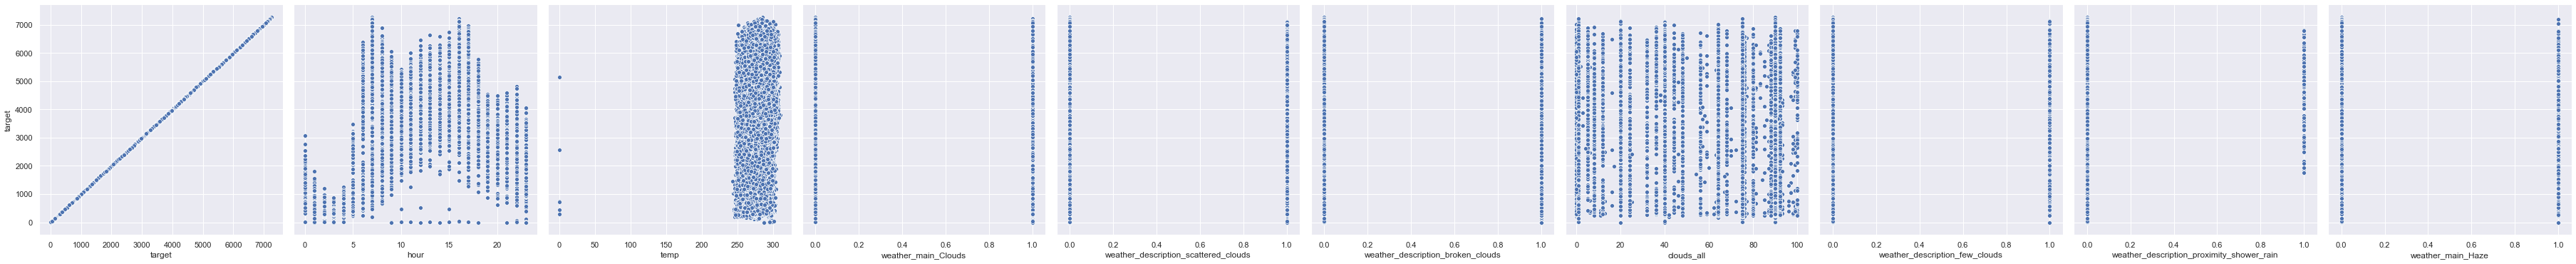

In [11]:

a = list(most_important_features.index)
sns.pairplot(data,height=5, x_vars = a , y_vars = 'target')
plt.show()

<h3>ci dessous est la partie que l'on modifie</h3>

<h1>Le $1^{ier}$Point : les clusters</h1> 

<div>
    <span style="color:red"> Ici on veut afficher notre jeu de donées en cluster pour une meilleure visualisation et pour pouvoir sélectionner les données liées. On va utiliser l'algorithme de base qui est celui des K-moyennes. On va effectuer un pca sur les données pour avoir seulement deux paramètres donc deux dimensions. Ensuite on applique les K-moyennes sur un nombre des clusters que l'on veut. </span>
</div>



In [12]:

def kmoy (x,Y): 
    from sklearn.cluster import KMeans
    from sklearn.datasets import make_blobs

#exemple pour visualiser les clusters avec la méthode des K-moyennes

        #on fait pca sur les données 
    scaler = StandardScaler()
    scaler.fit(x)
    scaled_data = scaler.transform(x)
    pca = PCA(n_components = 2)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    if(x_pca.shape== (38563, 2)):
        #on peut changer le nombre de clusters qu'on veut
        y_pred = KMeans(n_clusters=3,n_init=10, max_iter=300).fit_predict(x_pca)
        
        plt.figure(figsize=(12, 12))
        plt.scatter(x_pca[:, 0], x_pca[:,1], c=Y)
        plt.title("Visualisation des clusters avec couleurs associées au nombre de voitures")
            #on essaye d'afficher la légende c'est-à-dire la couleur des points correspond à une certaine quantité 
            #en l'occurence, Y est en fait target donc le nombre de voitures
            #qui passent donc on veut savoir à combien de voitures correspondent les couleurs 
        cb = plt.colorbar()
        cb.ax.tick_params(labelsize=12)
        plt.show()
        
        plt.figure(figsize=(12, 12))
        plt.scatter(x_pca[:, 0], x_pca[:,1], c=y_pred)
        plt.title("Visualisation des clusters avec couleurs associées à chaque clusters obtenus par Kmeans")
        plt.show()
    return 0

Ici on peut bien visualiser les clusters et on peut voir que si la couleur se rapproche du violet, c'est que peu de voitures sont passées, et à l'inverse, vers le beige c'est là où le plus de voitures passent.

<h1>Le $2^{ieme}$Point : Regressor</h1>

<div>
    <h2><span style="color:blue"> Ici on commence par essayer d'afficher une regression des données</span></h2>
</div>


Nous reprenons ce que nous avions fait la dernière fois sur tout le jeu de données pour l'appliquer seulement sur 2 paramètres. On doit donc appliquer le pca.

In [13]:
def regressor (x, Y):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    
    Y[Y==0] = 0.1

    Y = np.log(Y)
    #on fait pca sur les données 
    scaler = StandardScaler()
    scaler.fit(x)
    scaled_data = scaler.transform(x)
    pca = PCA(n_components = 2)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    
    if(x_pca.shape== (38563, 2)):

        x1=x_pca[:,0][:, np.newaxis]
        x2=x_pca[:,1][:, np.newaxis]

        regr_1 = DecisionTreeRegressor(max_depth=4)
        regr_1b = DecisionTreeRegressor(max_depth=7)
        regr_2 = DecisionTreeRegressor(max_depth=4)
        regr_2b = DecisionTreeRegressor(max_depth=7)
        regr_1.fit(x1, Y)
        regr_1b.fit(x1, Y)
        regr_2.fit(x2, Y)
        regr_2b.fit(x2, Y)


        # Predict
        X_test1= np.linspace(-3.0, 4.0, num=x.size)[:, np.newaxis]
        X_test2= np.linspace(-3.0, 5.0, num=x.size)[:, np.newaxis]
        y_1 = regr_1.predict(X_test1)
        y_1b = regr_1b.predict(X_test1)
        y_2 = regr_2.predict(X_test2)
        y_2b = regr_2b.predict(X_test2)
        
        if(y_1.shape==y_1b.shape and y_1b.shape==y_2.shape and y_2.shape==y_2b.shape):
            # Plot the results
            plt.figure()
            ax1.scatter(x1, Y, s=20, edgecolor="black",c="darkorange", label="data")
            ax1.plot(X_test1, y_1, color="cornflowerblue", label="max_depth=4", linewidth=2)
            ax1.plot(X_test1, y_1b, color="yellowgreen", label="max_depth=7", linewidth=2)
            ax1.set_xlabel("data")
            ax1.set_ylabel("target")
            ax1.set_xlim(-3,4)
            ax1.set_title("Decision Tree Regression pour le 1er paramètre")
            ax1.legend()

            ax2.scatter(x2, Y, s=20, edgecolor="black",c="darkorange", label="data")
            ax2.plot(X_test2, y_2, color="cornflowerblue", label="max_depth=4", linewidth=2)
            ax2.plot(X_test2, y_2b, color="yellowgreen", label="max_depth=7", linewidth=2)
            ax2.set_xlabel("data")
            ax2.set_ylabel("target")
            ax2.set_xlim(-3,5)
            ax2.set_title("Decision Tree Regression pour le 2nd paramètre")
            ax2.legend()
            plt.show() #lorsqu'on n'ajoute pas cette ligne, dans le main() au-dessous,
                     #le graphe s'affiche après avoir calculer tous les scores de la fonction comparePerformance
            
    return 0

<h1> Le $3^{ieme}$ Point: </h1>
Nous n'avions pas tout compris sur ce troisième point mais finalement nous ne pouvons pas le faire sur nos données si les autres binômes ne nous ont pas rendu leur travail. Donc on a fait ce point en reprenant les données du tp2. Maintenant il ne restera plus qu'à attendre les données du reste de notre groupe.

En essayant tous les types de $\textit{panda.plot}$, on s'est rendu compte que $\textit{panda.plot.bar}$ est le meilleur pour représenter les erreurs clairement.

In [14]:
def comparePerformance(model_name, model_list, D, bar=True,line=True):
    #pour la visualisation
    import pandas as pd
    #stocker les scores de performance sur train data et test data
    data_df = pd.DataFrame(columns =['perf_tr', 'perf_te'])
    
    #pour les données 
    from sklearn import model_selection
    from sklearn.model_selection import train_test_split  
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    X_entrainement,X_validation,Y_entrainement,Y_validation = train_test_split(X_train,Y_train,test_size=0.33,random_state=42)
    
    #pour les scores
    from sklearn.metrics import make_scorer
    from sklearn.model_selection import cross_val_score
    from libscores import get_metric
    metric_name, scoring_function = get_metric()

    for i in range(len(model_list)):
        M = model_list[i]
        M.fit(X_entrainement,Y_entrainement)
    
        Y_hat_train = M.predict(D.data['X_train']) 
        Y_hat_valid = M.predict(D.data['X_valid'])
        Y_hat_test = M.predict(D.data['X_test'])
    
        print('\n',model_name[i])
        print(metric_name, '= %5.4f' % scoring_function(Y_train, Y_hat_train))
        scores_train = cross_val_score(M, X_entrainement, Y_entrainement, cv=5, scoring=make_scorer(scoring_function))   
        scores_test = cross_val_score(M, X_validation, Y_validation, cv=5, scoring=make_scorer(scoring_function))
        print('Cross-validation tr: %0.2f (+/- %0.2f)' % (scores_train.mean(), scores_train.std() * 2))
        print('Cross-validation va: %0.2f (+/- %0.2f)' % (scores_test.mean(), scores_test.std() * 2))
    
        #fin de code de {model}
        data_df.loc[model_name[i]] = [scores_train.mean(), scores_test.mean()]
        
    if bar:
        data_df[['perf_tr', 'perf_te']].plot.bar()
        plt.ylim(0.5, 1)
        plt.ylabel(metric_name)
        plt.title("performance des modèles en histogramme")
    if line:
        data_df[['perf_tr', 'perf_te']].plot.line()
        plt.xticks(rotation=270)
        plt.ylabel(metric_name)
        plt.title("performance des modèles en ligne")
        
    return data_df

#### Main

In [15]:
def main() :
    from data_manager import DataManager
    D = DataManager(data_name, data_dir, replace_missing=True)

    #les données
    X=D.data['X_train']
    Y=D.data['Y_train']
    
    #on veut visualiser les clusters grâce aux k moyennes
    kmoy(X,Y)
    print("")
    
    #régression
    print("Régression des données ")
    regressor(X,Y)
    
    #comparaison de performance
    #on reprend des codes du sous-groupe "model" pour obtenir le resultat des scores.
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn import svm,linear_model
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.linear_model import ElasticNet
    from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

    model_name = [
       "Nearest Neighbors",
       "ElasticNet",
       "Decision tree",
       "Random Forest",
       "GradientBoosting",
       "Gradient optimise",
       "Forest optimise"]

    model_list = [                                                              
       KNeighborsRegressor(2),                                                 
       ElasticNet(random_state=0),                                             
       DecisionTreeRegressor(),                                    
       RandomForestRegressor(n_estimators=10),                                 
       GradientBoostingRegressor(random_state=1, n_estimators=10),              
   
       GradientBoostingRegressor(random_state=2, n_estimators=100, max_features = 'auto',
                                 loss = 'huber',
                                 learning_rate = 0.1,
                                 criterion =  'friedman_mse'),                                               
    
       RandomForestRegressor(n_estimators=140,   
                             max_features= 'auto',
                             random_state= 5,   
                             criterion= 'friedman_mse',    
                             max_depth= 50 )     
       ]
    #comparer la performance des modèles dans model_list sur D.data
    print("la performance")
    data_df = comparePerformance(model_name, model_list, D)
   


On a affiché deux graphiques : celui de gauche est la régression pour le paramètre 1 obtenu grâce au pca, et celui de droite celui de la régression pour le second paramètre du pca. Nous les avons affichés dans un espace log pour mieux observer les résultats. Aisni on voit qu'il y a des données à l'écart, que notre mdèle n'arrive donc pas à prédire correctement. 

Info file found : /Users/elsametivier/Desktop/L2/mini-projet-python/truck-master/starting_kit/input_data/xporters_public.info


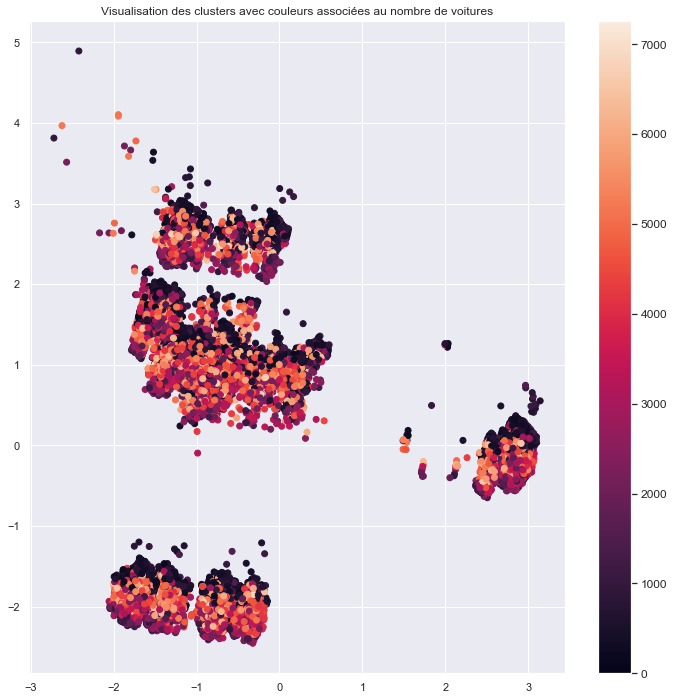

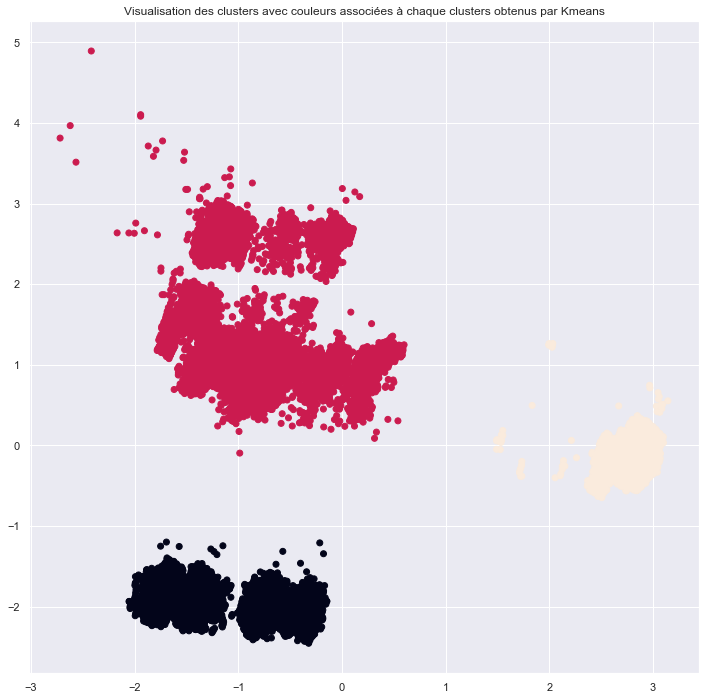


Régression des données 


/Users/elsametivier/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


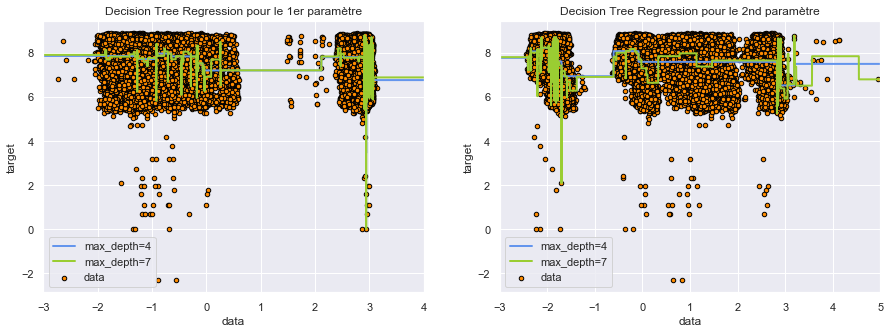

<Figure size 432x288 with 0 Axes>

la performance

 Nearest Neighbors
r2_metric = 0.8343
Cross-validation tr: 0.69 (+/- 0.03)
Cross-validation va: 0.64 (+/- 0.02)

 ElasticNet
r2_metric = 0.1597
Cross-validation tr: -1.24 (+/- 5.61)
Cross-validation va: 0.16 (+/- 0.01)

 Decision tree
r2_metric = 0.9676
Cross-validation tr: 0.89 (+/- 0.01)
Cross-validation va: 0.90 (+/- 0.02)

 Random Forest
r2_metric = 0.9747
Cross-validation tr: 0.94 (+/- 0.00)
Cross-validation va: 0.94 (+/- 0.01)

 GradientBoosting
r2_metric = 0.7352
Cross-validation tr: 0.73 (+/- 0.00)
Cross-validation va: 0.74 (+/- 0.01)

 Gradient optimise
r2_metric = 0.9192
Cross-validation tr: 0.92 (+/- 0.01)
Cross-validation va: 0.92 (+/- 0.01)

 Forest optimise
r2_metric = 0.9784
Cross-validation tr: 0.94 (+/- 0.00)
Cross-validation va: 0.95 (+/- 0.01)


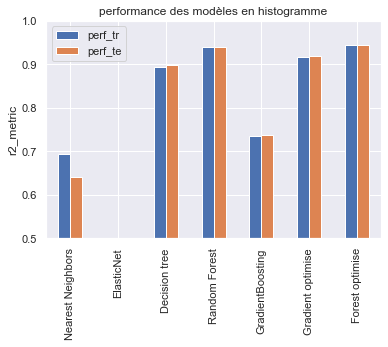

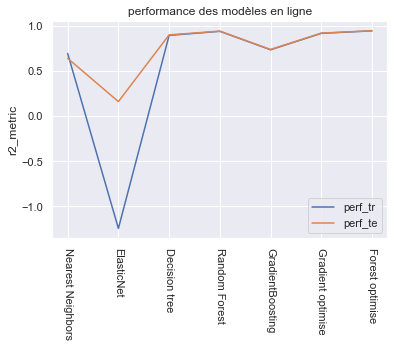

In [16]:
main()

On garde une version sans $main$ du $3^{ieme}$ point pour obtenir $data_df$ une fois pour tous, car c'est plus rapide pour le test et pour les autres modifications éventuelles
L'excecution est long pour calculer les scores donc enlève les commentaires avant $""""""$ quand on utilise pas ces codes

Info file found : /Users/elsametivier/Desktop/L2/mini-projet-python/truck-master/starting_kit/input_data/xporters_public.info
la performance

 Nearest Neighbors
r2_metric = 0.8343
Cross-validation tr: 0.69 (+/- 0.03)
Cross-validation va: 0.64 (+/- 0.02)

 ElasticNet
r2_metric = 0.1597
Cross-validation tr: -1.24 (+/- 5.61)
Cross-validation va: 0.16 (+/- 0.01)

 Decision tree
r2_metric = 0.9685
Cross-validation tr: 0.90 (+/- 0.00)
Cross-validation va: 0.90 (+/- 0.02)

 Random Forest
r2_metric = 0.9747
Cross-validation tr: 0.94 (+/- 0.00)
Cross-validation va: 0.94 (+/- 0.01)

 GradientBoosting
r2_metric = 0.7352
Cross-validation tr: 0.73 (+/- 0.00)
Cross-validation va: 0.74 (+/- 0.01)

 Gradient optimise
r2_metric = 0.9192
Cross-validation tr: 0.92 (+/- 0.01)
Cross-validation va: 0.92 (+/- 0.01)

 Forest optimise
r2_metric = 0.9784
Cross-validation tr: 0.94 (+/- 0.00)
Cross-validation va: 0.95 (+/- 0.01)


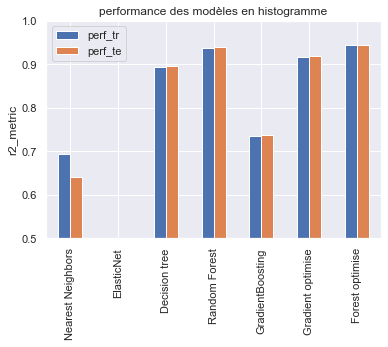

In [17]:
#"""

from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
#les données
X=D.data['X_train']
Y=D.data['Y_train']

#comparaison de performance
#on reprend des codes du sous-groupe "model" pour obtenir le resultat des scores.
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm,linear_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

model_name = [
       "Nearest Neighbors",
       "ElasticNet",
       "Decision tree",
       "Random Forest",
       "GradientBoosting",
       "Gradient optimise",
       "Forest optimise"]

model_list = [                                                              
       KNeighborsRegressor(2),                                                 
       ElasticNet(random_state=0),                                             
       DecisionTreeRegressor(),                                    
       RandomForestRegressor(n_estimators=10),                                 
       GradientBoostingRegressor(random_state=1, n_estimators=10),              
   
       GradientBoostingRegressor(random_state=2, n_estimators=100, max_features = 'auto',
                                 loss = 'huber',
                                 learning_rate = 0.1,
                                 criterion =  'friedman_mse'),                                               
    
       RandomForestRegressor(n_estimators=140,   
                             max_features= 'auto',
                             random_state= 5,   
                             criterion= 'friedman_mse',    
                             max_depth= 50 )     
       ]
#comparer la performance des modèles dans model_list sur D.data
print("la performance")
data_df = comparePerformance(model_name, model_list, D, line = False)
#"""

Text(0.5, 1.0, 'performance plot by line')

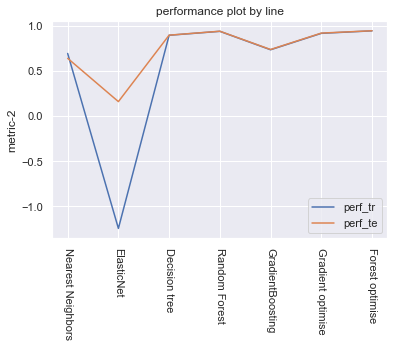

In [18]:
#"""
data_df[['perf_tr', 'perf_te']].plot.line()
plt.xticks(rotation=270)
plt.ylabel("metric-2")
plt.title("performance plot by line")
#"""

<div>
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
   <br>     <span style="color:red"> Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program </span>
</div>

In [19]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /Users/elsametivier/Desktop/L2/mini-projet-python/truck-master/starting_kit/input_data/xporters_public.info
DataManager : xporters
info:
	usage = Sample dataset Traffic Volume data
	name = traffic
	task = regression
	target_type = Numerical
	feat_type = Numerical
	metric = r2_metric
	time_budget = 1200
	feat_num = 59
	target_num = 3
	label_num = 3
	train_num = 35
	valid_num = 35
	test_num = 35
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(38563, 59)
	Y_train = array(38563,)
	X_valid = array(4820, 59)
	Y_valid = array(0,)
	X_test = array(4820, 59)
	Y_test = array(0,)
feat_type:	array(59,)
feat_idx:	array(0,)



<div>
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [20]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
# ??model 

<div>
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [21]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
M = M.load(trained_model_name)                  

<div>
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [22]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
if not(M.is_trained) : M.fit(X_train, Y_train)                     
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

FIT: dim(X)= [38563, 59]
FIT: dim(y)= [38563, 1]
PREDICT: dim(X)= [38563, 59]
PREDICT: dim(y)= [38563, 1]
PREDICT: dim(X)= [4820, 59]
PREDICT: dim(y)= [4820, 1]
PREDICT: dim(X)= [4820, 59]
PREDICT: dim(y)= [4820, 1]


In [23]:
print(Y_hat_train)

[ 785.64333333 4118.41177209 3494.91       ... 5717.20800309 4061.73350641
 5597.73734994]


<div>
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [24]:
M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/xporters_test.predict
sample_result_submission/xporters_train.predict
sample_result_submission/xporters_valid.predict


<div>
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [25]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
# ??scoring_function

Using scoring metric: r2_metric


<div>
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [26]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the r2_metric metric = 0.9918
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

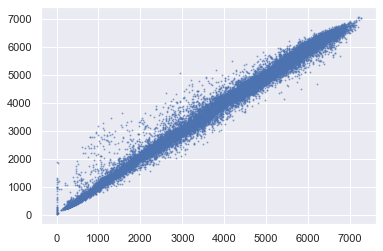

In [27]:
plt.scatter(Y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

<div>
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [28]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [30850, 59]
FIT: dim(y)= [30850, 1]
PREDICT: dim(X)= [7713, 59]
PREDICT: dim(y)= [7713, 1]
FIT: dim(X)= [30850, 59]
FIT: dim(y)= [30850, 1]
PREDICT: dim(X)= [7713, 59]
PREDICT: dim(y)= [7713, 1]
FIT: dim(X)= [30850, 59]
FIT: dim(y)= [30850, 1]
PREDICT: dim(X)= [7713, 59]
PREDICT: dim(y)= [7713, 1]
FIT: dim(X)= [30851, 59]
FIT: dim(y)= [30851, 1]
PREDICT: dim(X)= [7712, 59]
PREDICT: dim(y)= [7712, 1]
FIT: dim(X)= [30851, 59]
FIT: dim(y)= [30851, 1]
PREDICT: dim(X)= [7712, 59]
PREDICT: dim(y)= [7712, 1]

CV score (95 perc. CI): 0.95 (+/- 0.00)


<div>
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [29]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Could not find conda environment: python3
You can list all discoverable environments with `conda info --envs`.

Using input_dir: /Users/elsametivier/Desktop/L2/mini-projet-python/truck-master/starting_kit/input_data
Using output_dir: /Users/elsametivier/Desktop/L2/mini-projet-python/truck-master/starting_kit/sample_result_submission
Using program_dir: /Users/elsametivier/Desktop/L2/mini-projet-python/truck-master/starting_kit/ingestion_program
Using submission_dir: /Users/elsametivier/Desktop/L2/mini-projet-python/truck-master/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Xporters ********
************************************************
========= Reading and converting data ==========
Info file found : /Users/elsametivier/Desktop/L2/mini-projet-python/truck-master/starting_kit/input_data/xporters_public.info
========= Reading /Users/elsametivier/Desktop/L2/mini-projet

<div>
Also test the scoring program:
    </div>

In [30]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

Could not find conda environment: python3
You can list all discoverable environments with `conda info --envs`.

======= Set 1 (Xporters_train): r2_metric(set1_score)=0.991777003139 =======


<div>
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [31]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_20-04-04-12-34.zip
../sample_result_submission_20-04-04-12-34.zip
